In [1]:
!nvidia-smi

Sun Nov 10 20:36:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.79                 Driver Version: 531.79       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650       WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P0               12W /  N/A|      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
from google.colab import driveza

drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

# 1. Giới thiệu
## 1.1 Keras
- Phát triển bởi Google
- Static computational graphs (trước Tensorflow 2.0): Xây dựng đồ thị trước khi chạy, tối ưu hóa tốt hơn cho triển khai, nhưng phức tạp hơn khi debug.
- Từ TensorFlow 2.0: Hỗ trợ cả đồ thị tính toán động (Eager Execution), cải thiện sự linh hoạt.
## 1.2 Tensorflow
- Từ TensorFlow 2.0, Keras trở thành API mặc định của TensorFlow.
- Nhiều hàm hỗ trợ xây dựng mô hình nhanh mà không cần biết quá nhiều chi tiết kỹ thuật.
- Hỗ trợ scalability và deployment cho thích hợp để build những model lớn
## 1.3 Pytorch
- Phát triển bởi Facebook
- Dynamic computational graphs (trước Tensorflow 2.0): Xây dựng đồ thị trong khi chạy, dễ debug.

=> Về lý thuyết, TensorFlow phù hợp hơn trong production, đặc biệt trong việc triển khai, cập nhật, và duy trì mô hình, rất thích hợp cho các ứng dụng công nghiệp.

=> PyTorch phù hợp khi xây dựng các mô hình phức tạp hoặc custom mô hình có sẵn. Tuy nhiên Pytorch gần đây đã trở nên phổ biến nhờ các thư viện và mô hình nghiên cứu như Transformers hay timm, dẫn đến nhiều bản phát hành mới hơn dành cho nó.

=> Hiện nay Pytorch được dùng nhiều hơn


In [1]:
import torch

# 2. Tensor: tương tự np.array

In [2]:
import numpy as np

In [3]:
# Tạo một Tensor từ list cho trước sử dụng torch.Tensor
t = torch.Tensor([[6,7,8],[8,9,10]])
n = np.array([[6,7,8],[8,9,10]])

In [4]:
# Tạo một Tensor với kích thước (3, 4) và giá trị ngẫu nhiên tuân theo phân phối chuẩn với trung vị 0, phương sai 1
t = torch.randn(3, 4)
n = np.random.randn(3, 4)

In [5]:
# Tạo một Tensor với kích thước (3, 4) và tất cả phần tử đều bằng 1
t = torch.ones(3, 4)
n = np.ones((3, 4))

In [6]:
# Tạo một Tensor với kích thước (3, 4) và tất cả phần tử đều bằng 0
t = torch.zeros(3, 4)
n = np.zeros((3, 4))

In [7]:
# Tạo một Tensor với kích thước (3, 4) và giá trị ngẫu nhiên trong khoảng từ 0 -> 20
t = torch.randint(low=0, high=20, size=(3, 4))
n = np.random.randint(low=0, high=20, size=(3, 4))

In [8]:
# Sử dụng torch.from_numpy để chuyển đổi từ NumPy array sang Tensor
a = np.array([[6,7,8],[8,9,10]])
t = torch.from_numpy(a)

In [9]:
# Hoặc torch.as_tensor (dùng được cho list)
t = torch.as_tensor(a)

In [10]:
# Sử dụng .numpy() để chuyển đổi từ Tensor sang NumPy array
t.numpy()

array([[ 6,  7,  8],
       [ 8,  9, 10]])

## 2.1 Tensor operations

In [11]:
# Tạo 2 ma trận ngẫu nhiên
t = torch.randn(2, 4)
n = torch.randn(2, 4)

In [12]:
# Nhân 2 ma trận sử dụng .mm trong PyTorch
print(A.mm(W))
print(np.dot(A.numpy(), W.numpy()))

NameError: name 'A' is not defined

In [13]:
# Ma trận chuyển vị trong PyTorch
t = t.t()
n = n.T
print(t.shape)
print(n.shape)

torch.Size([4, 2])
torch.Size([4, 2])


In [14]:
# Bình phương mỗi giá trị trong Tensor
t = t**2
print(t)
# Tương ứng trong NumPy
n = n**2
print(n)

tensor([[0.2237, 0.4562],
        [2.1023, 2.1651],
        [0.2226, 1.4709],
        [0.2313, 1.5645]])
tensor([[0.0115, 1.1098],
        [0.1224, 2.8221],
        [1.0059, 1.4565],
        [0.0381, 1.2317]])


In [15]:
# Trả về kích thước của Tensor
t_size = t.size()
print(t_size)
# Tương ứng trong NumPy
n_size = n.shape
print(n_size)

torch.Size([4, 2])
torch.Size([4, 2])


In [16]:
t.shape

torch.Size([4, 2])

In [17]:
# Duỗi Tensor có kích thước (a,b) thành (1,a*b) trong PyTorch
t = t.flatten()
print(t)
# Tương ứng trong NumPy
n = n.flatten()
print(n)

tensor([0.2237, 0.4562, 2.1023, 2.1651, 0.2226, 1.4709, 0.2313, 1.5645])
tensor([0.0115, 1.1098, 0.1224, 2.8221, 1.0059, 1.4565, 0.0381, 1.2317])


In [18]:
t.shape

torch.Size([8])

In [19]:
t = t.unsqueeze(-1)
print(t.shape)

torch.Size([8, 1])


In [20]:
# Thêm 1 chiều với dim bằng 0 cho Tensor trong PyTorch
t = t.unsqueeze(0)
print(t.shape)
# Tương ứng trong NumPy (thêm trục)
n = np.expand_dims(n, 0)
print(n.shape)

torch.Size([1, 8, 1])
(1, 8)


In [21]:
t.shape

torch.Size([1, 8, 1])

In [22]:
n.shape

(1, 8)

In [23]:
np.expand_dims(n, 0).shape

(1, 1, 8)

In [24]:
t = t.squeeze(0)
print(t.shape)
# Tương ứng trong NumPy (bỏ trục thừa)
n = np.squeeze(n, 0)
print(n.shape)

torch.Size([8, 1])
(8,)


In [25]:
t = torch.randn(3, 4, 5)
t_transposed = t.transpose(1, 2)  #
print(t_transposed.shape)
n_transposed = np.transpose(t.numpy(), (0, 2, 1))
n_transposed_2 = t.numpy().swapaxes(1, 2)

print(n_transposed.shape, n_transposed_2.shape)

torch.Size([3, 5, 4])
(3, 5, 4) (3, 5, 4)


In [26]:
n_transposed[0]

array([[ 1.1808823 ,  1.1748395 ,  1.7758881 ,  0.4012791 ],
       [-0.30923653, -0.9462211 ,  0.40482393, -0.14731497],
       [-0.21072598, -0.14051513, -1.5185976 ,  0.30766112],
       [ 1.3000392 ,  0.66810834,  0.5376605 , -0.36484155],
       [-0.17686684, -0.99437225, -1.2369536 ,  0.98603666]],
      dtype=float32)

In [27]:
t.numpy()[0]

array([[ 1.1808823 , -0.30923653, -0.21072598,  1.3000392 , -0.17686684],
       [ 1.1748395 , -0.9462211 , -0.14051513,  0.66810834, -0.99437225],
       [ 1.7758881 ,  0.40482393, -1.5185976 ,  0.5376605 , -1.2369536 ],
       [ 0.4012791 , -0.14731497,  0.30766112, -0.36484155,  0.98603666]],
      dtype=float32)

In [28]:
# Sử dụng view để dữ liệu thành 2 chiều (thường áp dụng 3 chiều trở lên)
# PyTorch
t = t.view(t.size(0), -1) # Mặc định giữ số chiều đầu tiên, tính toán số chiều còn lại
# NumPy tương ứng
n = n.reshape(n.shape[0], -1)

## 4. Create model (kết thừa nn.Module)

In [29]:
import torch.nn as nn

In [30]:
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__() # Gọi hàm init lớp cha nn.Module
        self.lin1 = nn.Linear(256, 128)
        self.lin2 = nn.Linear(128, 10)
    def forward(self, input):
        x1 = self.lin1(input)
        x2 = self.lin2(x1)
        return x2

In [31]:
class MySkipCModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(256, 128)
        self.layer2 = nn.Linear(128, 256)
        self.layer3 = nn.Linear(128, 10)

    def forward(self, x):
        x_out1 = self.layer1(x)
        x_out2 = x + self.layer2(x_out1)
        x_out2 = self.layer1(x_out2)
        x = self.layer3(x_out2)
        return x

In [33]:
import torchvision.models as models
backbone = models.resnet50(pretrained=True)
list(backbone.children())

C:\Users\kkagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\kkagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\kkagi/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100.0%


[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): Bottleneck(
     (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (downsample): Sequential(
       (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
       (1): BatchNorm2d(256, eps=1e-05, momentum

### Extra: Giải thích về "*"
Dùng để unpacking mảng 1 chiều

In [34]:
def sum3(a, b, c):
    return a + b + c
array = [1, 2, 3]
result = sum3(array)

TypeError: sum3() missing 2 required positional arguments: 'b' and 'c'

In [35]:
sum3(*array)

6

### Với dictionary là **

In [27]:
def display(ten, tuoi, thanh_pho):
    print(f"Tên: {ten}, Tuổi: {tuoi}, Thành phố: {thanh_pho}")

In [28]:
thong_tin = {
    "ten": "Nguyễn Văn B",
    "tuoi": 30,
    "thanh_pho": "Đà Nẵng"
}

display(**thong_tin)

Tên: Nguyễn Văn B, Tuổi: 30, Thành phố: Đà Nẵng


In [29]:
list(backbone.children())[:-1]

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): Bottleneck(
     (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
     (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (downsample): Sequential(
       (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
       (1): BatchNorm2d(256, eps=1e-05, momentum

## Tiếp tục, ở đây dùng * để unpack các block của model ResNet

In [30]:
class MyModel(nn.Module):
    def __init__(self, num_cls):
        super(MyModel, self).__init__()
        self.num_cls = num_cls

        # Load the ResNet50 backbone
        backbone = models.resnet50(pretrained=True)

        # Remove the last fully connected layer
        self.model_backbone = nn.Sequential(*list(backbone.children())[:-1])  # Exclude the last layer

        # Define the classification layer
        self.clf = nn.Linear(backbone.fc.in_features, num_cls)

    def forward(self, input):
        output = self.model_backbone(input)  # Output shape: (batch_size, 2048, 1, 1)
        output = output.view(output.size(0), -1)  # Flatten the output to (batch_size, 2048)
        output = self.clf(output)  # Pass through the classifier
        return output

## Một số layer phổ biển:
nn.Linear

nn.Conv2d

nn.MaxPool2d

nn.ReLU

nn.BatchNorm2d

nn.Dropout

nn.Embedding

nn.GRU

nn.LSTM

nn.Softmax

nn.LogSoftmax

nn.MultiheadAttention

nn.TransformerEncoder


In [31]:
import torch.nn as nn
import torch
#Tạo một lớp Conv2d với đầu vào channals là 3, đầu ra là 256, với kernel có kích thước (3,3) và stride = 2
layers =  nn.Conv2d(3,256,(3,3),2)
#Mình sẽ tạo ngẫu nhiên một Tensor có chiều (3,256,256) để xem nó thay đổi như thế nào sau khi đi qua lớp Conv2d, kết quả sẽ được một Tensor có chiều (256,127,127)
print(layers(torch.randn(1,3,256,256)).shape)

torch.Size([1, 256, 127, 127])


# 6. Format dataset

In [32]:
# !pip install -U kagglehub

In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("playlist/men-women-classification")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/playlist/men-women-classification/versions/3


In [34]:
ls /root/.cache/kagglehub/datasets/playlist/men-women-classification/versions/3/data

men/  women/


In [35]:
data_folder = "/root/.cache/kagglehub/datasets/playlist/men-women-classification/versions/3/data"

In [123]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
traindir = data_folder


t = transforms.Compose([
        transforms.Resize(size=256),
    transforms.CenterCrop(size=224),
        transforms.ToTensor()])

train_dataset = ImageFolder(root=traindir,transform=t)

print("Num Images in Dataset:", len(train_dataset))
label_dict = {idx: cls for idx, cls in enumerate(train_dataset.classes)}
print("Label index", label_dict)

Num Images in Dataset: 3309
Label index {0: 'men', 1: 'women'}


In [124]:
print("Example Image and Label:")
image, label = train_dataset[2]
image.shape

Example Image and Label:


torch.Size([3, 224, 224])

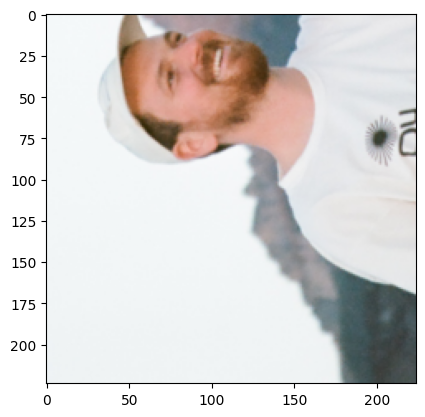

In [125]:
import matplotlib.pyplot as plt
image = image.transpose(0, 2)
plt.imshow(image)
plt.show()

In [126]:
import os
import cv2
import numpy as np
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms

# Define your custom dataset class
class myDataset(Dataset):
    def __init__(self, data_dict, trans=None):
        super().__init__()
        self.data_dict = data_dict
        self.trans = trans

    def __len__(self):
        return len(self.data_dict)

    def __getitem__(self, idx):
        image_path = self.data_dict[idx]['data_link']
        current_label = self.data_dict[idx]['label']
        if current_label == 0:
          label = torch.tensor([1.,0.])
        else:
          label = torch.tensor([0.,1.])

        # Attempt to read the image
        try:
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = Image.fromarray(image)  # Convert NumPy array to PIL Image
        except Exception as e:
            print(f"Error reading image {image_path}: {e}")
            # Create a blank image as a placeholder
            image = Image.new("RGB", (224, 224))  # Placeholder for invalid images

        if self.trans:
            image = self.trans(image)  # Apply the transformations

        return image, label  # Return the image (already a tensor) and the label

# Example transformations
transform = transforms.Compose([
    transforms.Resize(size=(256, 256)),
    transforms.CenterCrop(size=(224, 224)),
    transforms.ToTensor()  # Converts PIL image to tensor
])

data_dict = []

# Create the data_dict by iterating over the directories
for label, folder in enumerate(['men', 'women']):
    folder_path = os.path.join(data_folder, folder)
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, filename)
            data_dict.append({'data_link': image_path, 'label': label})

# Create the dataset
dataset = myDataset(data_dict=data_dict, trans=transform)

# Optionally, create a DataLoader
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Example of using the DataLoader
for images, labels in dataloader:
    print(images.shape, labels)
    break

torch.Size([32, 3, 224, 224]) tensor([[0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.]])


In [127]:
next_batch = next(iter(dataloader))
images, labels = next_batch
images.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32, 2]))

# Train

## Một số hàm loss
nn.MSE(),nn.CrossEntropyLoss(), nn.KLDivLoss(), nn.BCELoss, nn.NLLLoss()
## Một số optimizer
torch.optim.Adadelta , torch.optim.Adagrad , torch.optim.RMSprop
torch.optim.Adam

In [40]:
def custom_bce_loss(pred, target):
  bce_loss = nn.BCEWithLogitsLoss()
  return bce_loss(pred, target)

In [41]:
from torch.utils.data import random_split

In [42]:
train_size = int(0.7 * len(dataset))  # 70% for training
valid_size = int(0.15 * len(dataset))  # 15% for validation
test_size = len(dataset) - train_size - valid_size  # 15% for test

train_dataset, valid_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=128, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [43]:
next_batch = next(iter(train_dataloader))
next_batch[0].shape

torch.Size([128, 3, 224, 224])

In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Set the device

In [45]:
model = MyModel(2).to(device)
optimizer = torch.optim.Adam(model.parameters())

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [46]:
!pip install torchmetrics

In [47]:
from torchmetrics import Accuracy, F1Score

accuracy_metric = Accuracy(task="binary")
f1_metric = F1Score(task="binary", num_classes=2, average='weighted')

In [49]:
import torch
from tqdm import tqdm

num_epochs = 10
for epoch in range(num_epochs):
    # Training phase
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []

    for x_batch, y_batch in tqdm(train_dataloader):
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        pred = model(x_batch)

        loss = custom_bce_loss(pred, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        all_preds.extend(pred.cpu().detach().numpy())
        all_labels.extend(y_batch.cpu().detach().numpy())


    # Calculate training accuracy and F1 score
    all_preds = torch.as_tensor(all_preds)
    all_labels = torch.as_tensor(all_labels)
    train_accuracy = accuracy_metric(all_preds, all_labels)
    train_f1 = f1_metric(all_preds, all_labels)
    avg_train_loss = total_loss / len(train_dataloader)

    print(f'Epoch [{epoch+1}/{num_epochs}] - '
          f'Train Loss: {avg_train_loss:.4f}, '
          f'Train Accuracy: {train_accuracy:.4f}, '
          f'Train F1 Score: {train_f1:.4f}')

    # Validation phase
    model.eval()
    val_total_loss = 0
    val_all_preds = []
    val_all_labels = []

    with torch.no_grad():
        for x_batch, y_batch in tqdm(valid_dataloader):
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            pred = model(x_batch)
            val_loss = custom_bce_loss(pred, y_batch)

            val_total_loss += val_loss.item()
            val_all_preds.extend(pred.cpu().detach().numpy())
            val_all_labels.extend(y_batch.cpu().detach().numpy())

    # Calculate validation accuracy and F1 score
    all_preds = torch.as_tensor(val_all_preds)
    all_labels = torch.as_tensor(val_all_labels)
    val_accuracy = accuracy_metric(all_preds, all_labels)
    val_f1 = f1_metric(all_preds, all_labels)
    avg_val_loss = val_total_loss / len(valid_dataloader)

    print(f'Epoch [{epoch+1}/{num_epochs}] - '
          f'Validation Loss: {avg_val_loss:.4f}, '
          f'Validation Accuracy: {val_accuracy:.4f}, '
          f'Validation F1 Score: {val_f1:.4f}')
    

100%|██████████| 19/19 [01:10<00:00,  3.70s/it]
<ipython-input-49-d5aeec526054>:28: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  all_preds = torch.as_tensor(all_preds)


Epoch [1/10] - Train Loss: 0.3999, Train Accuracy: 0.8405, Train F1 Score: 0.8409


100%|██████████| 4/4 [00:11<00:00,  2.79s/it]


Epoch [1/10] - Validation Loss: 4.6489, Validation Accuracy: 0.6976, Validation F1 Score: 0.6982


100%|██████████| 19/19 [01:17<00:00,  4.10s/it]


Epoch [2/10] - Train Loss: 0.3400, Train Accuracy: 0.8456, Train F1 Score: 0.8457


100%|██████████| 4/4 [00:19<00:00,  4.97s/it]


Epoch [2/10] - Validation Loss: 1.4499, Validation Accuracy: 0.7248, Validation F1 Score: 0.7251


 26%|██▋       | 5/19 [00:19<00:55,  3.99s/it]


KeyboardInterrupt: 

In [53]:
import torch
import numpy as np
from sklearn.metrics import classification_report

# Assuming you have your test dataloader and model set up
all_labels = []
all_preds = []

# Evaluate the model on the test DataLoader
model.eval()  # Set the model to evaluation mode

with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_dataloader:  # Replace with your test dataloader
        images = images.to(device)  # Move images to device
        labels = labels.to(device)  # Move labels to device

        outputs = model(images)  # Your model's forward pass
        _, preds = torch.max(outputs, 1)  # Get the predicted class

        all_labels.extend(labels.argmax(dim=1).cpu().numpy())  # Collect true labels
        all_preds.extend(preds.cpu().numpy())  # Collect predictions

# Convert lists to numpy arrays
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# Generate and print the classification report
report = classification_report(all_labels, all_preds, target_names=['Class 0', 'Class 1'])  # Adjust class names as needed
print(report)

              precision    recall  f1-score   support

     Class 0       0.72      0.88      0.79       191
     Class 1       0.92      0.78      0.84       306

    accuracy                           0.82       497
   macro avg       0.82      0.83      0.82       497
weighted avg       0.84      0.82      0.82       497



# Pratice: Multiclass Classification

In [54]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.33, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.15, random_state=42)

In [58]:
class Data(Dataset):
    def __init__(self, X, y):
        self.x=torch.from_numpy(X)
        self.y=torch.from_numpy(y)
        self.len=self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [60]:
train_dataset = Data(x_train, y_train)
trainloader = DataLoader(dataset=train_dataset,batch_size=64)
val_dataset = Data(x_train, y_train)
val_loader = DataLoader(dataset=val_dataset,batch_size=64)
test_dataset = Data(x_train, y_train)
test_loader = DataLoader(dataset=test_dataset,batch_size=64)

In [61]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)


    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))
        x=self.linear2(x)
        return x

In [62]:
input_dim = 4
hidden_dim = 25
output_dim = 3
model = Net(input_dim,hidden_dim,output_dim)

# Yêu cầu: viết đoạn script để Train và Inference
+ Trong phần code train phải log ra được loss, Accuracy, Precision, Recall, F1.

**Hint**:

https://torchmetrics.readthedocs.io/en/v0.10.2/classification/precision_recall.html

https://lightning.ai/docs/torchmetrics/stable/classification/f1_score.html

https://lightning.ai/docs/torchmetrics/stable/classification/accuracy.html


+ Xuất ra bản classification_report bằng sklearn trong phần Inference
